In [576]:
# Import necessary libraries below
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
from scipy.stats import norm, skew

Now, let's get started by reading in the data from the `'train.csv'` file and storing it the DataFrame `df`. Subsequently, be sure to preview the data.

In [577]:
# Use pandas to load the csv file
train = pd.read_csv('train.csv')
train_Id = train['Id']
train.drop("Id", axis = 1, inplace = True)
train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [578]:
test = pd.read_csv('test.csv')
test_Id = test['Id']
test.drop("Id", axis = 1, inplace = True)
test.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [579]:
ntrain = train.shape[0]
ntest = test.shape[0]
print(ntrain)
print(ntest)
df = pd.concat((train, test)).reset_index(drop=True)

1460
1459


In [580]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     2919 non-null   int64  
 1   MSZoning       2915 non-null   object 
 2   LotFrontage    2433 non-null   float64
 3   LotArea        2919 non-null   int64  
 4   Street         2919 non-null   object 
 5   Alley          198 non-null    object 
 6   LotShape       2919 non-null   object 
 7   LandContour    2919 non-null   object 
 8   Utilities      2917 non-null   object 
 9   LotConfig      2919 non-null   object 
 10  LandSlope      2919 non-null   object 
 11  Neighborhood   2919 non-null   object 
 12  Condition1     2919 non-null   object 
 13  Condition2     2919 non-null   object 
 14  BldgType       2919 non-null   object 
 15  HouseStyle     2919 non-null   object 
 16  OverallQual    2919 non-null   int64  
 17  OverallCond    2919 non-null   int64  
 18  YearBuil

In [581]:
df.isnull().sum().sort_values(ascending=False)[:40]

PoolQC          2909
MiscFeature     2814
Alley           2721
Fence           2348
SalePrice       1459
FireplaceQu     1420
LotFrontage      486
GarageCond       159
GarageYrBlt      159
GarageQual       159
GarageFinish     159
GarageType       157
BsmtCond          82
BsmtExposure      82
BsmtQual          81
BsmtFinType2      80
BsmtFinType1      79
MasVnrType        24
MasVnrArea        23
MSZoning           4
Utilities          2
Functional         2
BsmtFullBath       2
BsmtHalfBath       2
GarageCars         1
BsmtFinSF2         1
Exterior2nd        1
GarageArea         1
TotalBsmtSF        1
BsmtUnfSF          1
BsmtFinSF1         1
Exterior1st        1
KitchenQual        1
SaleType           1
Electrical         1
LandContour        0
LotShape           0
Street             0
LotArea            0
YearRemodAdd       0
dtype: int64

In [582]:
df["PoolQC"] = df["PoolQC"].fillna("NoPool")

In [583]:
df["MiscFeature"] = df["MiscFeature"].fillna("NoMiscFeature")

In [584]:
df["Alley"] = df["Alley"].fillna("NoAlley")

In [585]:
df["Fence"] = df["Fence"].fillna("NoFence")

In [586]:
df["FireplaceQu"] = df["FireplaceQu"].fillna("NoFirePlace")

In [587]:
#Group by neighborhood and fill in missing value by the median LotFrontage of all the neighborhood
df["LotFrontage"] = df.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))

In [588]:
column_names = df.columns #
[name for name in column_names if name.startswith('Garage')]

['GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond']

/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/axisgrid.py:1912: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


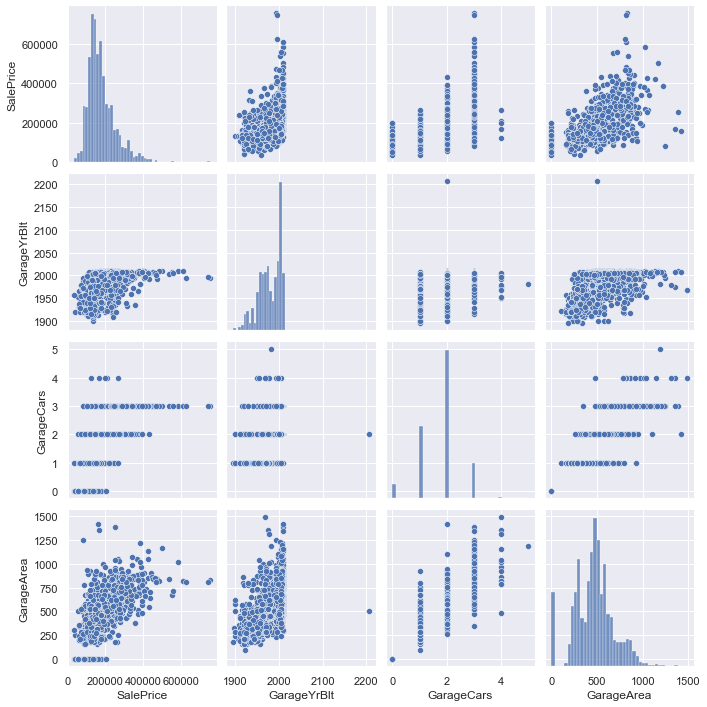

In [589]:
sns.set()
cols = ['SalePrice', 'GarageType','GarageYrBlt','GarageFinish','GarageCars','GarageArea','GarageQual','GarageCond']
sns.pairplot(df[cols], size = 2.5)
plt.show();

In [590]:
df.drop(['GarageArea','GarageYrBlt'],axis=1,inplace=True)

In [591]:
df['GarageCond'] = df['GarageCond'].fillna('None')
df['GarageQual'] = df['GarageQual'].fillna('None')
df['GarageFinish'] = df['GarageFinish'].fillna('None')
df['GarageType'] = df['GarageType'].fillna('None')

In [592]:
df['GarageCars'] = df['GarageCars'].fillna(0)

In [593]:
[name for name in column_names if name.startswith('Bsmt')]

['BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'BsmtFullBath',
 'BsmtHalfBath']

In [594]:
df['BsmtQual'] = df['BsmtQual'].fillna('None')
df['BsmtCond'] = df['BsmtCond'].fillna('None')
df['BsmtExposure'] = df['BsmtExposure'].fillna('None')
df['BsmtFinType1'] = df['BsmtFinType1'].fillna('None')
df['BsmtFinType2'] = df['BsmtFinType2'].fillna('None')

In [595]:
df['TotalBsmtSF'] = df['TotalBsmtSF'].fillna(0)
df['BsmtHalfBath'] = df['BsmtHalfBath'].fillna(0)
df['BsmtFullBath'] = df['BsmtFullBath'].fillna(0)
df['BsmtFinSF2'] = df['BsmtFinSF2'].fillna(0)
df['BsmtFinSF1'] = df['BsmtFinSF1'].fillna(0)
df['BsmtUnfSF'] = df['BsmtUnfSF'].fillna(0)

/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/axisgrid.py:1912: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


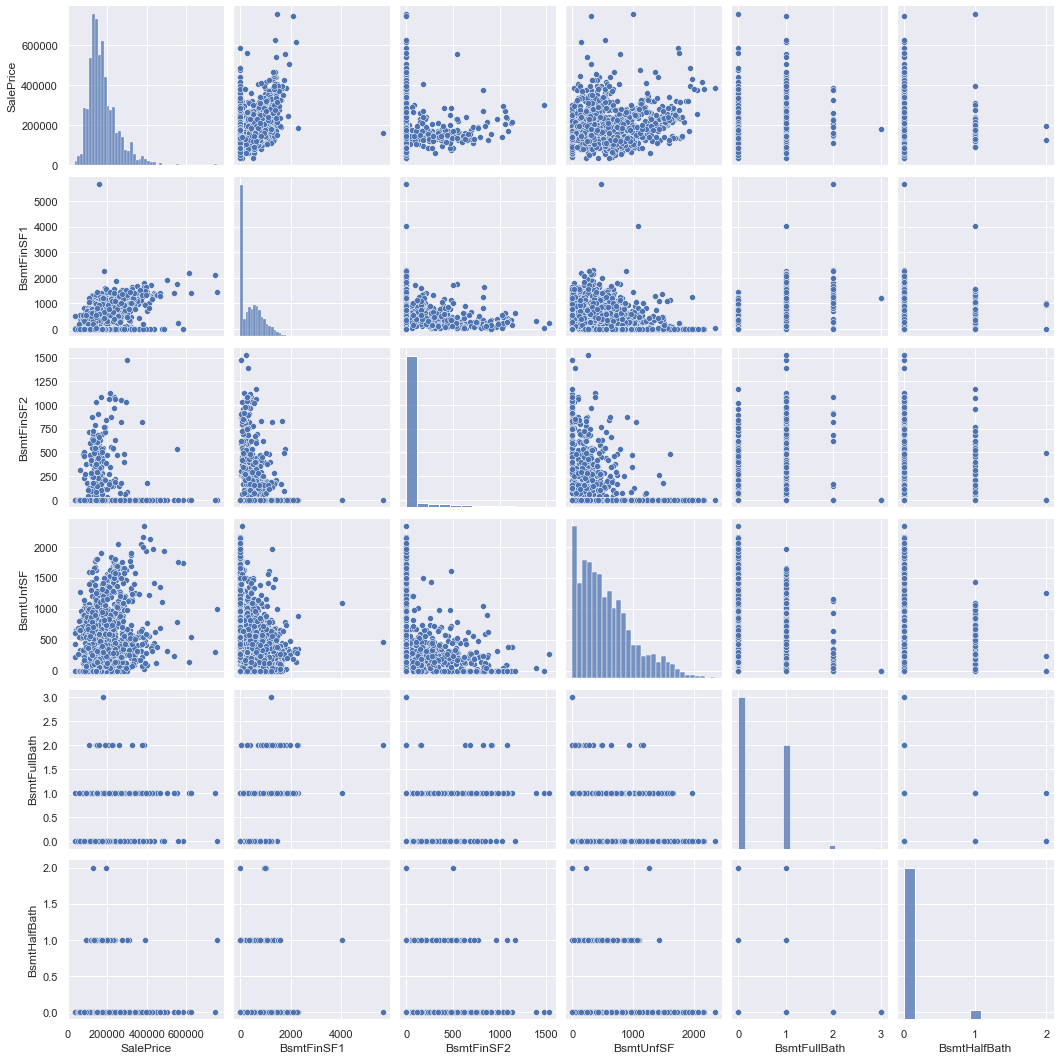

In [596]:
sns.set()
cols = ['SalePrice','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinSF1','BsmtFinType2','BsmtFinSF2','BsmtUnfSF','BsmtFullBath','BsmtHalfBath',]
sns.pairplot(df[cols], size = 2.5)
plt.show();

In [597]:
df['MasVnrType'] = df['MasVnrType'].fillna('None')
df['MasVnrArea'] = df['MasVnrArea'].fillna(0)

In [598]:
#MSZoning: Identifies the general zoning classification of the sale.
df['MSZoning'] = df['MSZoning'].fillna(df['MSZoning'].mode()[0])

In [599]:
#Functional: Home functionality (Assume typical unless deductions are warranted)
df["Functional"] = df["Functional"].fillna("Typ")

In [600]:
df['Utilities'].value_counts()
#df[''].value_counts()

AllPub    2916
NoSeWa       1
Name: Utilities, dtype: int64

In [601]:
df.drop('Utilities',axis=1,inplace=True)

In [602]:
df['Exterior1st'].value_counts()

VinylSd    1025
MetalSd     450
HdBoard     442
Wd Sdng     411
Plywood     221
CemntBd     126
BrkFace      87
WdShing      56
AsbShng      44
Stucco       43
BrkComm       6
AsphShn       2
CBlock        2
Stone         2
ImStucc       1
Name: Exterior1st, dtype: int64

In [603]:
df['Exterior2nd'].value_counts()

VinylSd    1014
MetalSd     447
HdBoard     406
Wd Sdng     391
Plywood     270
CmentBd     126
Wd Shng      81
BrkFace      47
Stucco       47
AsbShng      38
Brk Cmn      22
ImStucc      15
Stone         6
AsphShn       4
CBlock        3
Other         1
Name: Exterior2nd, dtype: int64

In [604]:
df['Exterior1st'] = df['Exterior1st'].fillna(df['Exterior1st'].mode()[0])
df['Exterior2nd'] = df['Exterior2nd'].fillna(df['Exterior2nd'].mode()[0])

In [605]:
df['Electrical'].value_counts()

SBrkr    2671
FuseA     188
FuseF      50
FuseP       8
Mix         1
Name: Electrical, dtype: int64

In [606]:
df['Electrical'] = df['Electrical'].fillna(df['Electrical'].mode()[0])

In [607]:
df['KitchenQual'].value_counts()

TA    1492
Gd    1151
Ex     205
Fa      70
Name: KitchenQual, dtype: int64

In [608]:
df['KitchenQual'] = df['KitchenQual'].fillna(df['KitchenQual'].mode()[0])

In [609]:
df['SaleType'].value_counts()

WD       2525
New       239
COD        87
ConLD      26
CWD        12
ConLI       9
ConLw       8
Oth         7
Con         5
Name: SaleType, dtype: int64

In [610]:
df['SaleType'] = df['SaleType'].fillna(df['SaleType'].mode()[0])

In [611]:
df.isnull().sum().sort_values(ascending=False)[:5]

SalePrice      1459
Foundation        0
RoofMatl          0
Exterior1st       0
Exterior2nd       0
dtype: int64

In [612]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 77 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     2919 non-null   int64  
 1   MSZoning       2919 non-null   object 
 2   LotFrontage    2919 non-null   float64
 3   LotArea        2919 non-null   int64  
 4   Street         2919 non-null   object 
 5   Alley          2919 non-null   object 
 6   LotShape       2919 non-null   object 
 7   LandContour    2919 non-null   object 
 8   LotConfig      2919 non-null   object 
 9   LandSlope      2919 non-null   object 
 10  Neighborhood   2919 non-null   object 
 11  Condition1     2919 non-null   object 
 12  Condition2     2919 non-null   object 
 13  BldgType       2919 non-null   object 
 14  HouseStyle     2919 non-null   object 
 15  OverallQual    2919 non-null   int64  
 16  OverallCond    2919 non-null   int64  
 17  YearBuilt      2919 non-null   int64  
 18  YearRemo

In [613]:
df['MSSubClass'] = df['MSSubClass'].apply(str)
df['OverallCond'] = df['OverallCond'].astype(str)
df['YrSold'] = df['YrSold'].astype(str)
df['MoSold'] = df['MoSold'].astype(str)

In [614]:
from sklearn.preprocessing import LabelEncoder
cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold')

for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(df[c].values)) 
    df[c] = lbl.transform(list(df[c].values))
       
print('Shape all_data: {}'.format(df.shape))

Shape all_data: (2919, 77)


In [615]:
df['TotalSF'] = df['TotalBsmtSF'] + df['1stFlrSF'] + df['2ndFlrSF']

In [616]:
df['TotalBath'] = df['BsmtFullBath'] + df['BsmtHalfBath'] + df['FullBath'] + df['HalfBath']

In [617]:
df.head(10)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,...,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,TotalSF,TotalBath
0,10,RL,65.0,8450,1,1,3,Lvl,Inside,0,...,4,NoMiscFeature,0,4,2,WD,Normal,208500.0,2566.0,4.0
1,5,RL,80.0,9600,1,1,3,Lvl,FR2,0,...,4,NoMiscFeature,0,7,1,WD,Normal,181500.0,2524.0,3.0
2,10,RL,68.0,11250,1,1,0,Lvl,Inside,0,...,4,NoMiscFeature,0,11,2,WD,Normal,223500.0,2706.0,4.0
3,11,RL,60.0,9550,1,1,0,Lvl,Corner,0,...,4,NoMiscFeature,0,4,0,WD,Abnorml,140000.0,2473.0,2.0
4,10,RL,84.0,14260,1,1,0,Lvl,FR2,0,...,4,NoMiscFeature,0,3,2,WD,Normal,250000.0,3343.0,4.0
5,9,RL,85.0,14115,1,1,0,Lvl,Inside,0,...,2,Shed,700,1,3,WD,Normal,143000.0,2158.0,3.0
6,5,RL,75.0,10084,1,1,3,Lvl,Inside,0,...,4,NoMiscFeature,0,10,1,WD,Normal,307000.0,3380.0,3.0
7,10,RL,80.0,10382,1,1,0,Lvl,Corner,0,...,4,Shed,350,2,3,WD,Normal,200000.0,3197.0,4.0
8,9,RM,51.0,6120,1,1,3,Lvl,Inside,0,...,4,NoMiscFeature,0,6,2,WD,Abnorml,129900.0,2726.0,2.0
9,4,RL,50.0,7420,1,1,3,Lvl,Corner,0,...,4,NoMiscFeature,0,0,2,WD,Normal,118000.0,2068.0,2.0


In [618]:
df = pd.get_dummies(df)
df.head(10)

,MSSubClass,LotFrontage,LotArea,Street,Alley,LotShape,LandSlope,OverallQual,OverallCond,YearBuilt,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,10,65.0,8450,1,1,3,0,7,4,2003,...,0,0,0,1,0,0,0,0,1,0
1,5,80.0,9600,1,1,3,0,6,7,1976,...,0,0,0,1,0,0,0,0,1,0
2,10,68.0,11250,1,1,0,0,7,4,2001,...,0,0,0,1,0,0,0,0,1,0
3,11,60.0,9550,1,1,0,0,7,4,1915,...,0,0,0,1,1,0,0,0,0,0
4,10,84.0,14260,1,1,0,0,8,4,2000,...,0,0,0,1,0,0,0,0,1,0
5,9,85.0,14115,1,1,0,0,5,4,1993,...,0,0,0,1,0,0,0,0,1,0
6,5,75.0,10084,1,1,3,0,8,4,2004,...,0,0,0,1,0,0,0,0,1,0
7,10,80.0,10382,1,1,0,0,7,5,1973,...,0,0,0,1,0,0,0,0,1,0
8,9,51.0,6120,1,1,3,0,7,4,1931,...,0,0,0,1,1,0,0,0,0,0
9,4,50.0,7420,1,1,3,0,5,5,1939,...,0,0,0,1,0,0,0,0,1,0


/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


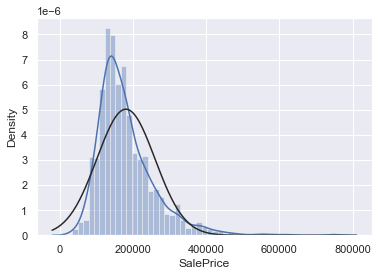

In [619]:
sns.distplot(df['SalePrice'] , fit=norm);

/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


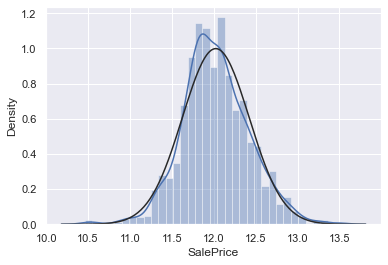

In [620]:
df["SalePrice"] = np.log1p(df["SalePrice"])

#Check the new distribution 
sns.distplot(df['SalePrice'] , fit=norm);

In [621]:
df.drop(['SalePrice'], axis=1, inplace=True)

In [622]:
y_train = train.SalePrice.values

In [623]:
train = df[:ntrain]
test = df[ntrain:]

In [624]:
import xgboost as xgb
from sklearn.model_selection import cross_val_score, KFold

In [625]:
xgbr = xgb.XGBRegressor(verbosity=0) 
xgbr.fit(train, y_train)
score = xgbr.score(train, y_train)  
print("Training score: ", score)

Training score:  0.9993496743265288


In [626]:
scores = cross_val_score(xgbr, train, y_train, cv=10)
print("Mean cross-validation score: %.2f" % scores.mean())

Mean cross-validation score: 0.87


In [627]:
kfold = KFold(n_splits=10, shuffle=True)
kf_cv_scores = cross_val_score(xgbr, train, y_train, cv=kfold )
print("K-fold CV average score: %.2f" % kf_cv_scores.mean())

K-fold CV average score: 0.85


In [628]:
xgbr.fit(train, y_train)
y_train_pred = xgbr.predict(train)
y_test_pred = xgbr.predict(test)

In [629]:
y_test_pred

array([118466.29, 164626.52, 185722.69, ..., 175125.39, 126763.13,
       224188.5 ], dtype=float32)

In [638]:
result = pd.DataFrame()
result['Id'] = test_Id
result['SalePrice'] = y_test_pred
result.head()

,Id,SalePrice
0,1461,118466.289062
1,1462,164626.515625
2,1463,185722.687500
3,1464,199434.156250
4,1465,183651.062500


In [640]:
result.to_csv("predictions.csv",index=False)